In [1]:
#At first, we import python libraries that we need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import tkinter as tk
from tkinter import messagebox


## Reading data & Preprocessing

In [2]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [4]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [5]:
X, y = df.drop("Drug", axis=1), df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [6]:
X_train.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

In [7]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [8]:
X_train_array=np.array(X_train)
X_test_array=np.array(X_test)

In [20]:
array=np.expand_dims(X_train_array[4],axis=0)
array

array([[49.   ,  1.   ,  2.   ,  2.   , 13.598]])

In [10]:
X_train_array.shape, X_test_array.shape

((140, 5), (60, 5))

## Defining Model and fitting

In [70]:



# --------------------------------------- Model Definition --------------------------------------- #
model = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

# --------------------------------------- Model Training --------------------------------------- #

# Train
fit=model.fit(X_train, y_train)

# Prediction
predictions = model.predict(X_test)



In [71]:
train_pred=model.predict(X_train)

## Results

In [72]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, train_pred)))

Training-set accuracy score: 1.0000


In [73]:

print('Model accuracy score with information gain: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score with information gain: 1.0000


In [74]:
y_test.shape

(60,)

In [75]:
X_test.shape

(60, 5)

In [76]:
y_test

75     drugY
3      drugX
119    drugY
38     drugX
176    drugA
126    drugY
72     drugX
164    drugY
30     drugX
170    drugX
95     drugX
173    drugY
167    drugX
11     drugY
143    drugY
23     drugY
196    drugC
183    drugY
94     drugY
160    drugX
2      drugC
158    drugC
125    drugY
101    drugA
131    drugY
48     drugY
110    drugA
0      drugY
85     drugB
141    drugY
151    drugB
25     drugY
197    drugX
6      drugY
69     drugY
83     drugA
19     drugY
36     drugA
65     drugY
7      drugC
161    drugB
184    drugY
181    drugX
146    drugX
116    drugX
5      drugX
93     drugY
134    drugY
15     drugY
188    drugY
71     drugY
187    drugA
61     drugA
87     drugY
162    drugX
27     drugX
124    drugB
128    drugY
17     drugA
112    drugX
Name: Drug, dtype: object

In [102]:
X_test

,Age,Sex,BP,Cholesterol,Na_to_K
75,26,1,2,2,20.909
3,28,2,1,1,7.798
119,61,2,3,1,25.475
38,39,2,1,2,9.709
176,48,1,3,2,10.446
126,66,1,3,1,16.347
72,24,2,1,1,10.605
164,16,1,3,2,19.007
30,18,2,1,2,8.750
170,28,2,1,1,12.879


In [78]:
X_test.iloc[16]

Age            16.000
Sex             1.000
BP              2.000
Cholesterol     1.000
Na_to_K        12.006
Name: 196, dtype: float64

In [85]:
pred_test=model.predict(np.expand_dims(X_test.iloc[10],axis=0))
pred_test,y_test[95]

c:\anaconda3\envs\tf2.4\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(array(['drugX'], dtype=object), 'drugX')

## Visualization

[Text(0.6666666666666666, 0.9, 'Na_to_K <= 14.899\nsamples = 140\nvalue = [15, 12, 12, 38, 63]\nclass = drugY'),
 Text(0.5555555555555556, 0.7, 'BP <= 2.5\nsamples = 77\nvalue = [15, 12, 12, 38, 0]\nclass = drugX'),
 Text(0.3333333333333333, 0.5, 'Cholesterol <= 1.5\nsamples = 50\nvalue = [0, 0, 12, 38, 0]\nclass = drugX'),
 Text(0.2222222222222222, 0.3, 'BP <= 1.5\nsamples = 24\nvalue = [0, 0, 12, 12, 0]\nclass = drugC'),
 Text(0.1111111111111111, 0.1, 'samples = 12\nvalue = [0, 0, 0, 12, 0]\nclass = drugX'),
 Text(0.3333333333333333, 0.1, 'samples = 12\nvalue = [0, 0, 12, 0, 0]\nclass = drugC'),
 Text(0.4444444444444444, 0.3, 'samples = 26\nvalue = [0, 0, 0, 26, 0]\nclass = drugX'),
 Text(0.7777777777777778, 0.5, 'Age <= 50.0\nsamples = 27\nvalue = [15, 12, 0, 0, 0]\nclass = drugA'),
 Text(0.6666666666666666, 0.3, 'samples = 15\nvalue = [15, 0, 0, 0, 0]\nclass = drugA'),
 Text(0.8888888888888888, 0.3, 'samples = 12\nvalue = [0, 12, 0, 0, 0]\nclass = drugB'),
 Text(0.7777777777777778,

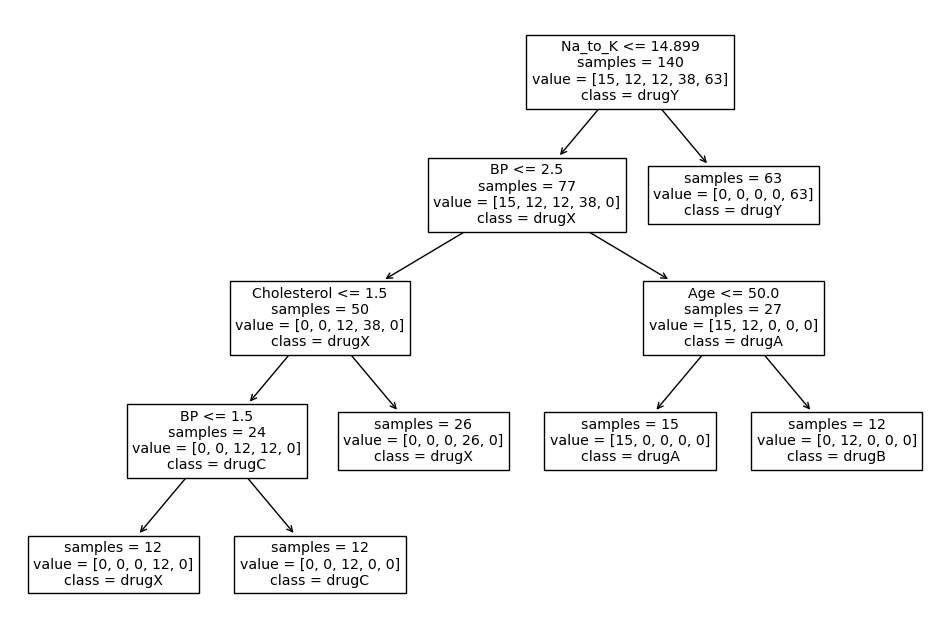

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(fit,
               class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
               feature_names=['Age','Sex' , 'BP', 'Cholesterol', 'Na_to_K'],impurity=False)

In [105]:
def test_decision_tree(input_values):
    # TODO: Implement your decision tree testing logic here
    pred=model.predict(np.expand_dims(input_values,axis=0))
    return pred


In [106]:
def create_ui():
    # Create a new window
    window = tk.Tk()
    window.title("Decision Tree Testing")

    # Create a label and entry for each input value
    input_labels = ["Age:", "Sex:", "Bloodp:","Cholesterol:","Na_k:"]
    input_entries = []
    for i, label_text in enumerate(input_labels):
        label = tk.Label(window, text=label_text)
        label.grid(row=i, column=0, sticky="e")
        entry = tk.Entry(window)
        entry.grid(row=i, column=1)
        input_entries.append(entry)

    # Create a button to trigger the decision tree testing
    def test_button_click():
        input_values = [float(entry.get()) for entry in input_entries]
        result = test_decision_tree(input_values)
        messagebox.showinfo("Result", f"The predicted class is: {result}")

    button = tk.Button(window, text="Test", command=test_button_click)
    button.grid(row=len(input_labels), columnspan=2)

    # Run the Tkinter event loop
    window.mainloop()

# Call the function to create the UI
create_ui()


c:\anaconda3\envs\tf2.4\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
